# K-Means algorithm - Theory
One of the simplest and most used clustering algorithms

---


---

![K-means](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)


### What is clustering?

> Definition: It is a task of identifying subgroups in the data such that data points in the same subgroup (**cluster**) are very similar while data points in different clusters are very different.

In other words, it is an **unsupervised learning** method where we try to find *homogenous* groups in our data such that the points in each cluster are as similar as possible to one another according to a similarity measure, such as **euclidean distance**. 

### How does k-means work?


> Definition: It is an **iterative algorithm** that tries to partition the dataset into **K** pre-defined **distinct** **non-overlapping** subgroups (**clusters**) where **each data point belongs to only one group**.

Steps:


1.   Specify the number of clusters *K*. There are ways in which you can find the number of clusters and we are going to look at that tomorrow. For today, we use our "intuition" to select a number. 
2.   Select *K* points at random: we need to start somewhere so we start by selecting 3 points at random that will act as our **centroids***. These points don't necessarily have to be any of our data points.
3. Start creating the clusters: to do this, we measure the distance between each of our data points and each of our centroids. We assign each data point to the closest centroid. 
4. Compute new centroids for each cluster. 
5. Calculate the within-cluster variation (calculate the total variance of each cluster). 
6. Repeat steps 3-5. The stopping criteria is up to whoever is running the algorithm, but it is usually the number of iterations. The [default value for k-means using sklearn is 300](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). You can also use convergence; we say that an algorithm has converged when the progress between iterations is non-existent or minimal. 
7. Choose as final solution the clusters with the least within-cluster variation (formally known as Within-Cluster Sum of Squares or WCSS for whoever wants to check out the formula). 

> *centroid = center of our cluster

# K-Means algorithm - Practice

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring penguins dataset

We have recieved information about a group of penguins placed in the [Palmer Archipelago](https://goo.gl/maps/AcdUwugk8CQC4x73A). Our research team, WBS Explorers School, suspects there are multiple penguins species, but we only have information about their: 

* Bill length
* Bill depth
* Flipper length
* Body mass

> Problem: How can we find the different species?


### Import and clean data
What should we be looking for in the data to make sure it is ready for k-means?

In [2]:
penguins = sns.load_dataset('penguins') # loading one of the datasets from seaborn: https://github.com/mwaskom/seaborn-data
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.dropna(inplace=True) # remove missing values
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
penguins.drop(['species','island','sex'], axis=1, inplace=True) # drop some columns we are not going to use
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


### Visualise the data

*   What does it tell us? 
*   If we were to cluster without any computer help, how many clusters would we choose? 




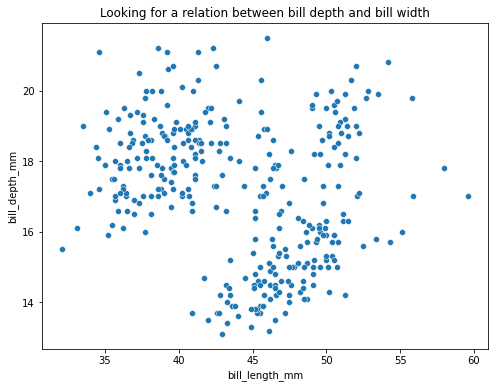

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.title('Looking for a relation between bill depth and bill width')
plt.show()

### Data Scaling

In [6]:
peng_cl = penguins[['bill_length_mm','bill_depth_mm']]  # let's only use the measurements related to the bill
peng_cl.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


In [7]:
peng_cl.describe()

,bill_length_mm,bill_depth_mm
count,333.000000,333.000000
mean,43.992793,17.164865
std,5.468668,1.969235
min,32.100000,13.100000
25%,39.500000,15.600000
50%,44.500000,17.300000
75%,48.600000,18.700000
max,59.600000,21.500000


In [8]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler() -> Transform features by scaling each feature to a given range; default is between 0 and 1. 
# .fit_transform() -> fit finds the minimum and the maximum and transform will change your data in regard to the fit values.
peng_cl_norm = MinMaxScaler().fit_transform(peng_cl)

What data type is peng_cl_norm? Note: remember that you can use type() to check this.

In [9]:
type(peng_cl_norm)

numpy.ndarray

In [10]:
# let's see the first 5 observations after normalising the data
peng_cl_norm = pd.DataFrame(peng_cl_norm) #turn it back into a dataframe
peng_cl_norm.columns = ['bill_length_mm','bill_depth_mm']
peng_cl_norm[:5]

,bill_length_mm,bill_depth_mm
0,0.254545,0.666667
1,0.269091,0.511905
2,0.298182,0.583333
3,0.167273,0.738095
4,0.261818,0.892857


## K-means

Before we start coding, let's have a quick look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).  

In [11]:
from sklearn.cluster import KMeans

# Based on the quick look to the scatter plot, 
# we are going to assume there can be 3 different species so our k = 3. 
kmeans = KMeans(n_clusters=3)
kmeans.fit(peng_cl_norm)  # Compute k-means clustering

KMeans(n_clusters=3)

In [12]:
kmeans.cluster_centers_

array([[0.64637762, 0.66703297],
       [0.24378378, 0.61357786],
       [0.54930303, 0.22480159]])

In [13]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['bill_length_mm','bill_depth_mm']
cl_pos

,bill_length_mm,bill_depth_mm
0,0.646378,0.667033
1,0.243784,0.613578
2,0.549303,0.224802


### Explore our KMeans results

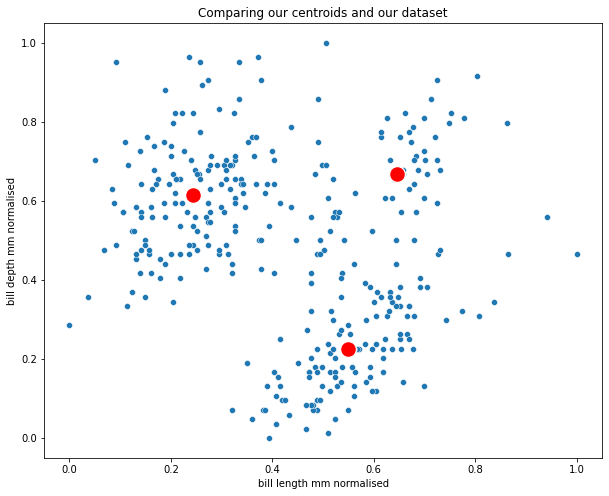

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(peng_cl_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('bill length mm normalised')
plt.ylabel('bill depth mm normalised')
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm')
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

In [15]:
penguins['cluster'] = kmeans.labels_
penguins.sample(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
289,50.7,15.0,223.0,5550.0,2
78,36.2,16.1,187.0,3550.0,1
296,47.5,14.2,209.0,4600.0,2
288,43.5,14.2,220.0,4700.0,2
19,46.0,21.5,194.0,4200.0,0


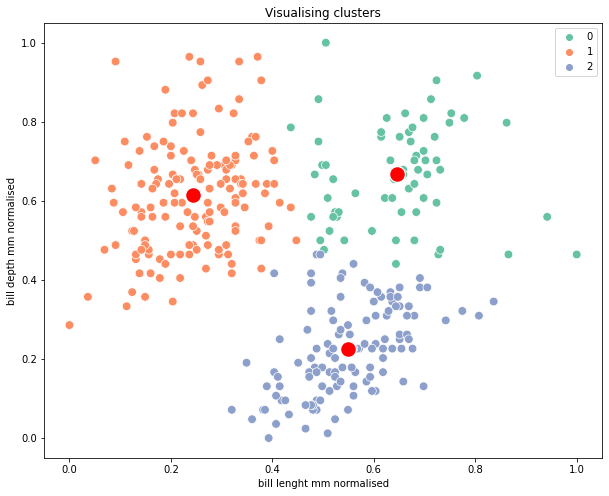

In [16]:
# create plot dataframe
plot_data = pd.DataFrame(peng_cl_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm']
plot_data['cluster'] = kmeans.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('bill lenght mm normalised')
plt.ylabel('bill depth mm normalised')

# scatter plot
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

## Let's try again, but with all columns and StandardScaler

In [17]:
peng_cl_all = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
peng_cl_all.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [18]:
from sklearn.preprocessing import StandardScaler
peng_cl_all_norm = StandardScaler().fit_transform(peng_cl_all)

kmeans_all = KMeans(n_clusters=3)
kmeans_all.fit(peng_cl_all_norm)

KMeans(n_clusters=3)

In [19]:
kmeans_all.cluster_centers_

array([[ 0.67202511,  0.80526339, -0.28934658, -0.38410387],
       [ 0.65475809, -1.10270671,  1.16246305,  1.10121078],
       [-1.04680889,  0.48662566, -0.88169491, -0.7627539 ]])

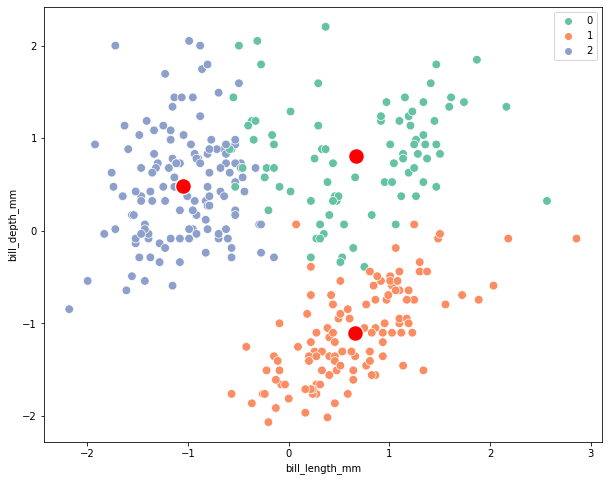

In [20]:
cl_pos = pd.DataFrame(kmeans_all.cluster_centers_)
cl_pos.columns = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
cl_pos

fig, ax = plt.subplots(figsize=(10, 8))

plot_data = pd.DataFrame(peng_cl_all_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
plot_data['cluster'] = kmeans_all.labels_

sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

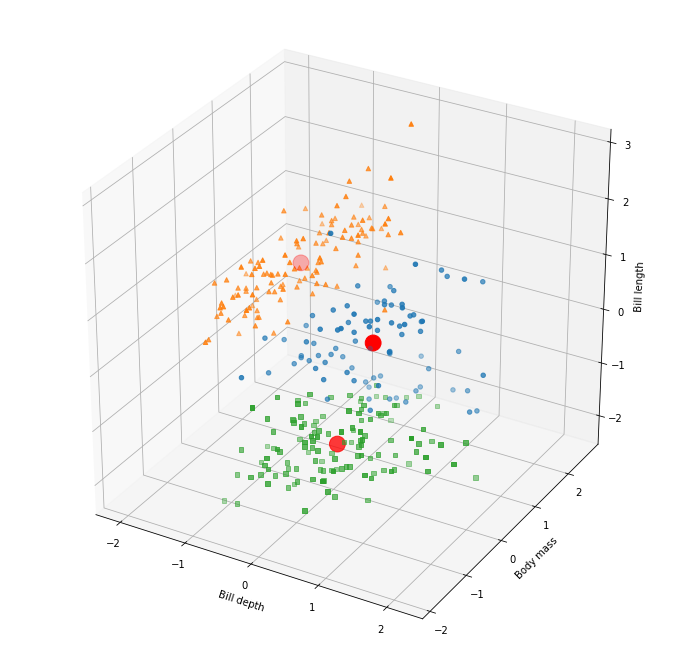

In [21]:
import matplotlib.pyplot as plt
import random
colors = ['r','g','b']
markers = ['o', '^','s']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# ax.scatter(plot_data['bill_depth_mm'], plot_data['bill_length_mm'], plot_data['flipper_length_mm'])
for marker, d in plot_data.groupby('cluster'):
    ax.scatter(d['bill_depth_mm'], d['body_mass_g'], d['bill_length_mm'], marker=markers[marker], label=d['cluster'])
ax.scatter(cl_pos['bill_depth_mm'], cl_pos['body_mass_g'],cl_pos['bill_length_mm'], color='red', s=250)
ax.set_xlabel('Bill depth')
ax.set_ylabel('Body mass')
ax.set_zlabel('Bill length')
plt.show()

## Just another way of plotting

Another way to compare different variables is to use a spyder chart visualisation.

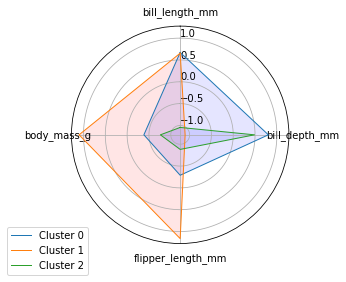

In [22]:
# Source: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
# Libraries
from math import pi
 
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

## Conclusion
Using KMeans, we were able to identify each observation to which species could belong.

![](https://i.imgur.com/orZWHly.png)

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081


